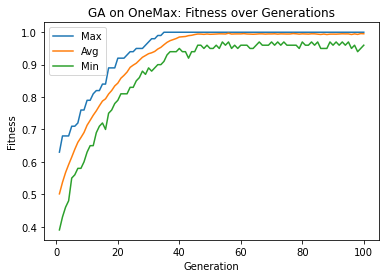

In [1]:
import random
import matplotlib.pyplot as plt

# Parameters
length = 100        # Gene length
population = 100    # Number of parent individuals
offspring_n = 50    # Number of offspring individuals
generation_num = 100  # Number of generations
mutation_rate = 1.0 / length  # Mutation probability per gene

# Initialize population
def initialize():
    return [[random.randint(0, 1) for _ in range(length)] for _ in range(population)]

# Evaluate fitness
def evaluate(gene):
    return [sum(ind) / length for ind in gene]

# Parent selection (tournament)
def choice_parents(gene, fitness):
    idx1 = random.randint(0, population - 1)
    idx2 = random.randint(0, population - 1)
    return gene[idx1] if fitness[idx1] > fitness[idx2] else gene[idx2]

# Crossover
def crossover(father, mother):
    return [father[i] if random.random() < 0.5 else mother[i] for i in range(length)]

# Mutation
def mutation(offspring):
    return [bit if random.random() > mutation_rate else 1 - bit for bit in offspring]

# Elitism: keep top 50 parents and 50 offspring
def elite(gene, fitness, next_gene):
    sorted_idx = sorted(range(population), key=lambda i: fitness[i], reverse=True)
    elites = [gene[i] for i in sorted_idx[:population // 2]]
    return elites + next_gene

# Run GA and collect data
max_list, avg_list, min_list = [], [], []
gene = initialize()
for gen in range(generation_num):
    fitness = evaluate(gene)
    max_list.append(max(fitness))
    min_list.append(min(fitness))
    avg_list.append(sum(fitness) / population)
    next_gene = []
    for _ in range(offspring_n):
        father = choice_parents(gene, fitness)
        mother = choice_parents(gene, fitness)
        child = crossover(father, mother)
        child = mutation(child)
        next_gene.append(child)
    gene = elite(gene, fitness, next_gene)

# Visualization
plt.figure()
plt.plot(range(1, generation_num + 1), max_list)
plt.plot(range(1, generation_num + 1), avg_list)
plt.plot(range(1, generation_num + 1), min_list)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(['Max', 'Avg', 'Min'])
plt.title('GA on OneMax: Fitness over Generations')
plt.show()
